# **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# **Reading Data and EDA**

In [ ]:
df = pd.read_csv("Occupancy_Estimation.csv")
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [ ]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [ ]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
S1_Temp,1.000000,0.799707,0.948839,0.855279,0.680743,0.548735,0.645163,0.212217,0.436099,0.391137,0.438769,0.355826,0.866718,0.137391,0.436363,0.474077,0.700868
S2_Temp,0.799707,1.000000,0.765525,0.696581,0.639773,0.645987,0.607349,0.370897,0.438274,0.409545,0.427133,0.378724,0.743722,0.202547,0.476901,0.465884,0.671263
S3_Temp,0.948839,0.765525,1.000000,0.885186,0.594311,0.500054,0.642601,0.301419,0.375183,0.344026,0.398177,0.326182,0.821308,0.095842,0.403355,0.460309,0.652047
S4_Temp,0.855279,0.696581,0.885186,1.000000,0.581482,0.456350,0.588459,0.386871,0.355111,0.312594,0.340808,0.294939,0.650320,0.106208,0.340000,0.339037,0.526509
S1_Light,0.680743,0.639773,0.594311,0.581482,1.000000,0.842090,0.816438,0.510853,0.601166,0.534274,0.494080,0.441712,0.602740,0.498185,0.607159,0.545213,0.849058
S2_Light,0.548735,0.645987,0.500054,0.456350,0.842090,1.000000,0.709579,0.458914,0.503021,0.560630,0.439269,0.413932,0.566764,0.493281,0.554658,0.556797,0.788764
S3_Light,0.645163,0.607349,0.642601,0.588459,0.816438,0.709579,1.000000,0.579484,0.502606,0.434859,0.577151,0.473606,0.650829,0.447708,0.501836,0.577815,0.793081
S4_Light,0.212217,0.370897,0.301419,0.386871,0.510853,0.458914,0.579484,1.000000,0.293632,0.303949,0.169702,0.200793,0.148608,0.212718,0.324545,0.220196,0.355715
S1_Sound,0.436099,0.438274,0.375183,0.355111,0.601166,0.503021,0.502606,0.293632,1.000000,0.560062,0.540736,0.557733,0.391903,0.335772,0.522015,0.463040,0.573748
S2_Sound,0.391137,0.409545,0.344026,0.312594,0.534274,0.560630,0.434859,0.303949,0.560062,1.000000,0.529830,0.578635,0.333836,0.357235,0.485697,0.507231,0.557853


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second

In [ ]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Year,Month,Day,Hour,Minute,Second
0,2017-12-22,2024-01-30 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.769231,0,0,1,2017,12,22,10,49,41
1,2017-12-22,2024-01-30 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.646154,0,0,1,2017,12,22,10,50,12
2,2017-12-22,2024-01-30 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.519231,0,0,1,2017,12,22,10,50,42
3,2017-12-22,2024-01-30 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.388462,0,0,1,2017,12,22,10,51,13
4,2017-12-22,2024-01-30 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.253846,0,0,1,2017,12,22,10,51,44


In [ ]:
df = df.drop(['Date', 'Time'], axis = 1)

In [ ]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Year,Month,Day,Hour,Minute,Second
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,...,0.769231,0,0,1,2017,12,22,10,49,41
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,...,0.646154,0,0,1,2017,12,22,10,50,12
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,...,0.519231,0,0,1,2017,12,22,10,50,42
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,...,0.388462,0,0,1,2017,12,22,10,51,13
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,...,0.253846,0,0,1,2017,12,22,10,51,44


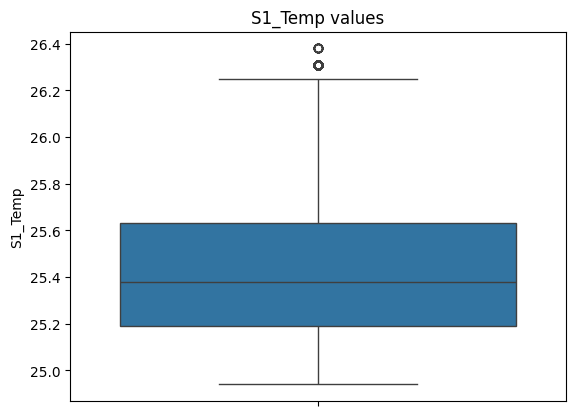

In [ ]:
sns.boxplot(y = 'S1_Temp', data = df)
plt.title("S1_Temp values")
plt.show()

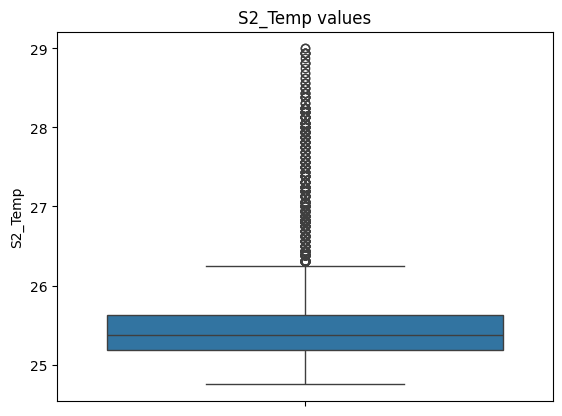

In [ ]:
sns.boxplot(y = 'S2_Temp', data = df)
plt.title("S2_Temp values")
plt.show()

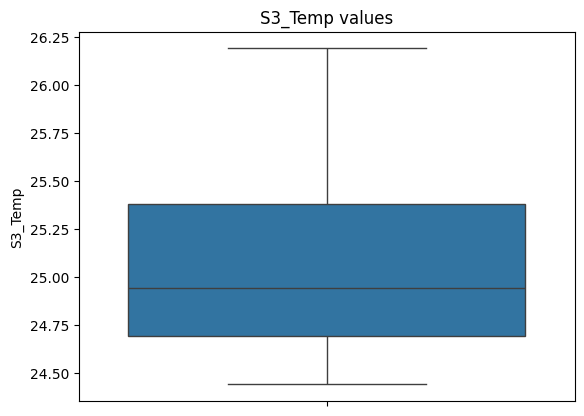

In [ ]:
sns.boxplot(y = 'S3_Temp', data = df)
plt.title("S3_Temp values")
plt.show()

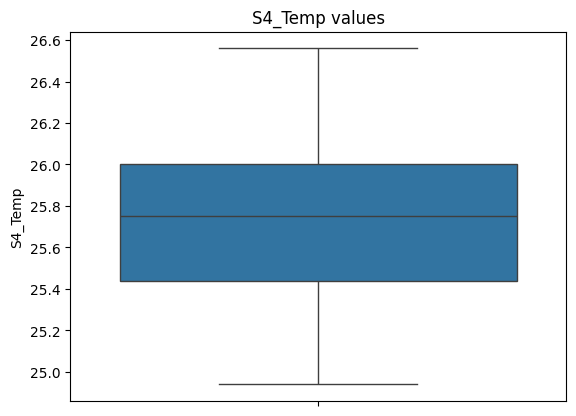

In [ ]:
sns.boxplot(y = 'S4_Temp', data = df)
plt.title("S4_Temp values")
plt.show()

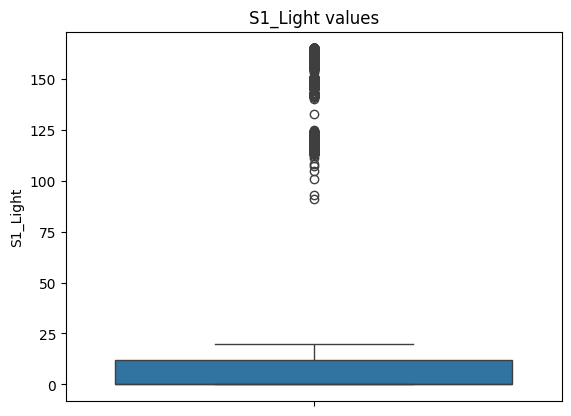

In [ ]:
sns.boxplot(y = 'S1_Light', data = df)
plt.title("S1_Light values")
plt.show()

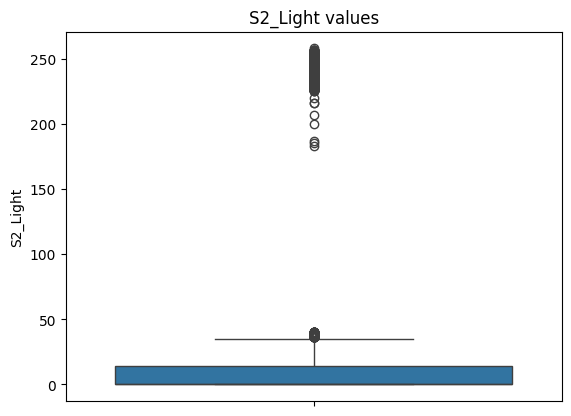

In [ ]:
sns.boxplot(y = 'S2_Light', data = df)
plt.title("S2_Light values")
plt.show()

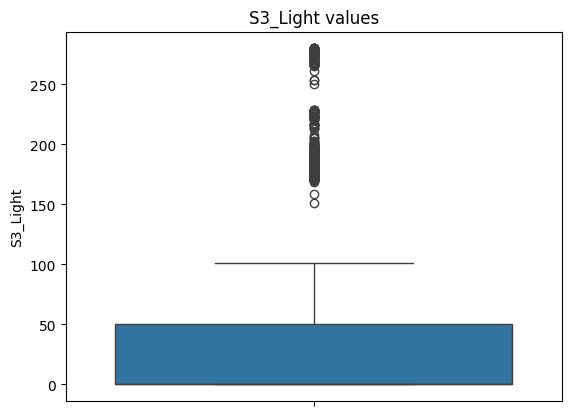

In [ ]:
sns.boxplot(y = 'S3_Light', data = df)
plt.title("S3_Light values")
plt.show()

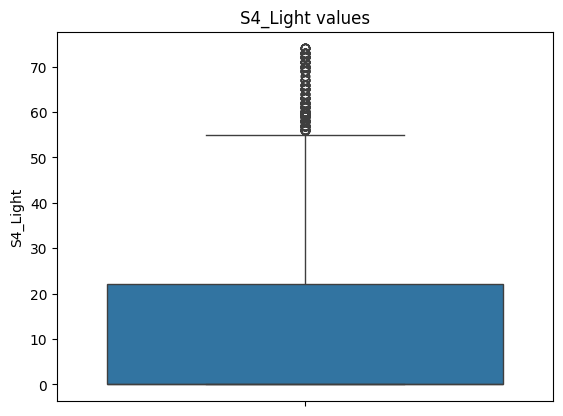

In [ ]:
sns.boxplot(y = 'S4_Light', data = df)
plt.title("S4_Light values")
plt.show()

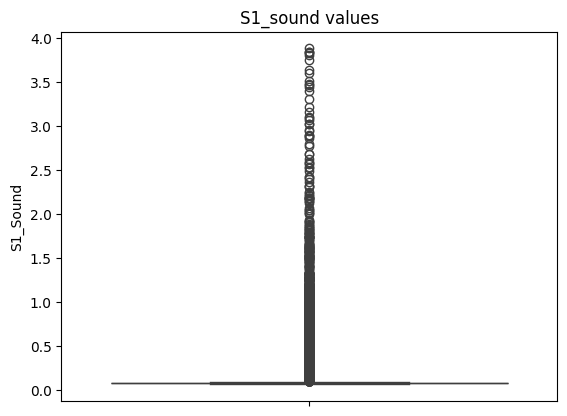

In [ ]:
sns.boxplot(y = 'S1_Sound', data = df)
plt.title("S1_sound values")
plt.show()

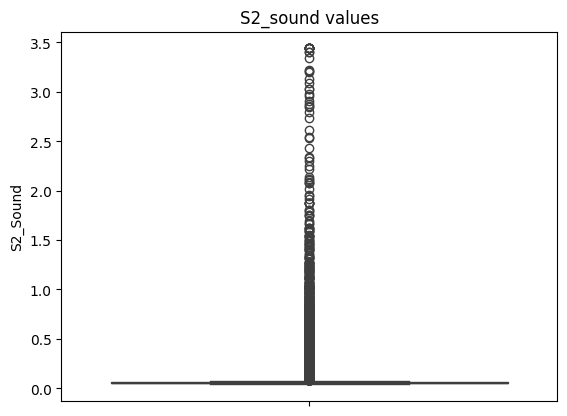

In [ ]:
sns.boxplot(y = 'S2_Sound', data = df)
plt.title("S2_sound values")
plt.show()

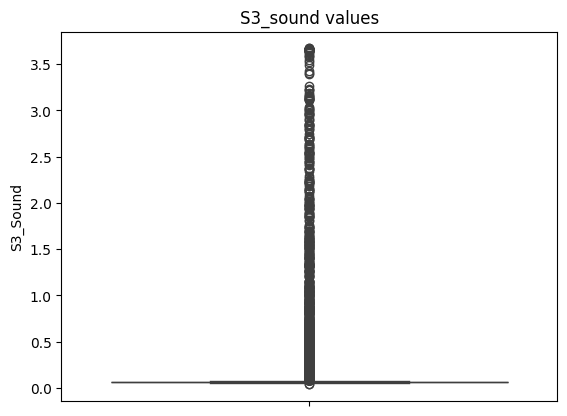

In [ ]:
sns.boxplot(y = 'S3_Sound', data = df)
plt.title("S3_sound values")
plt.show()

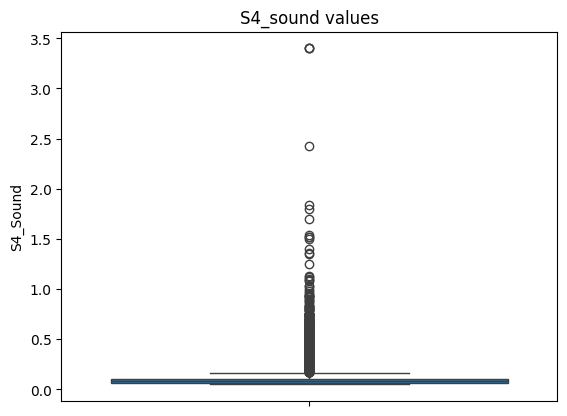

In [ ]:
sns.boxplot(y = 'S4_Sound', data = df)
plt.title("S4_sound values")
plt.show()

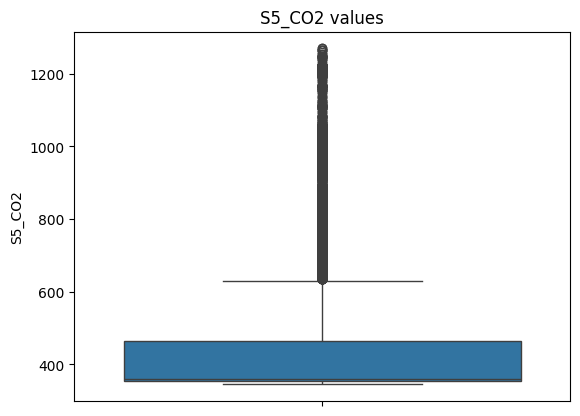

In [ ]:
sns.boxplot(y = 'S5_CO2', data = df)
plt.title("S5_CO2 values")
plt.show()

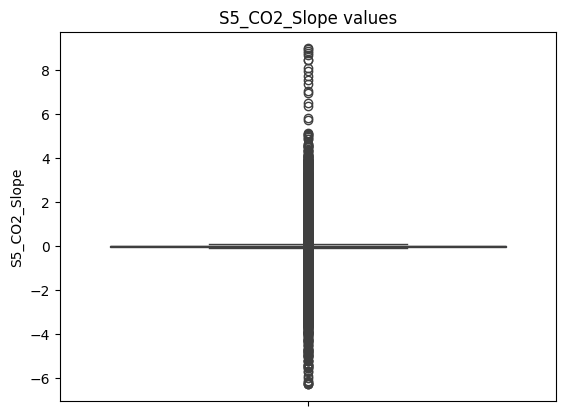

In [ ]:
sns.boxplot(y = 'S5_CO2_Slope', data = df)
plt.title("S5_CO2_Slope values")
plt.show()

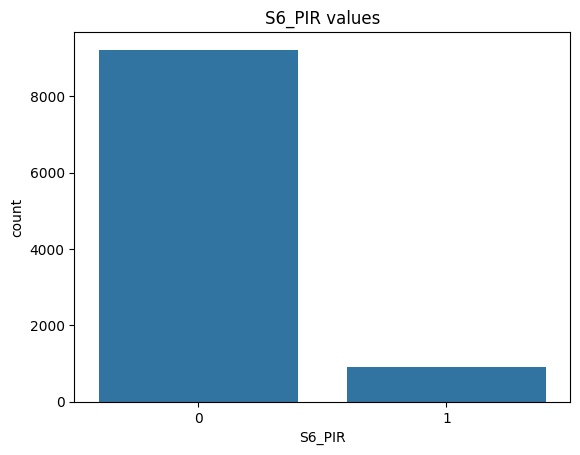

In [ ]:
sns.countplot(x = 'S6_PIR', data = df)
plt.title("S6_PIR values")
plt.show()

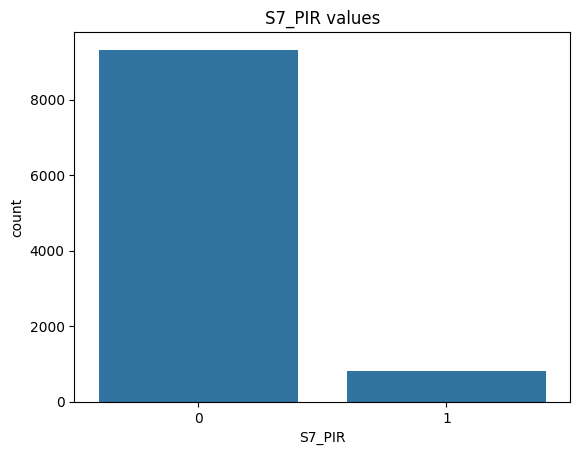

In [ ]:
sns.countplot(x = 'S7_PIR', data = df)
plt.title("S7_PIR values")
plt.show()

In [ ]:
df['Room_Occupancy_Count'].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

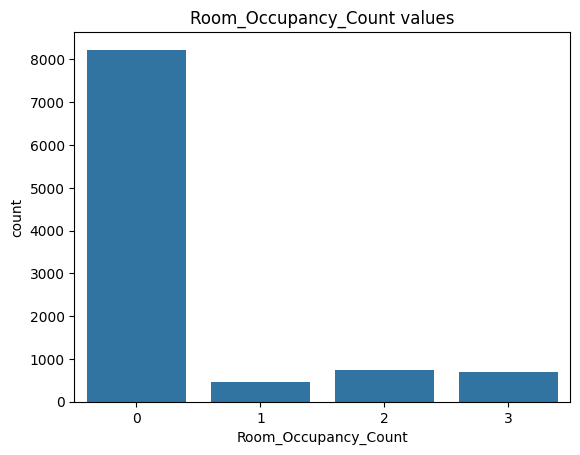

In [ ]:
sns.countplot(x = 'Room_Occupancy_Count', data = df)
plt.title("Room_Occupancy_Count values")
plt.show()

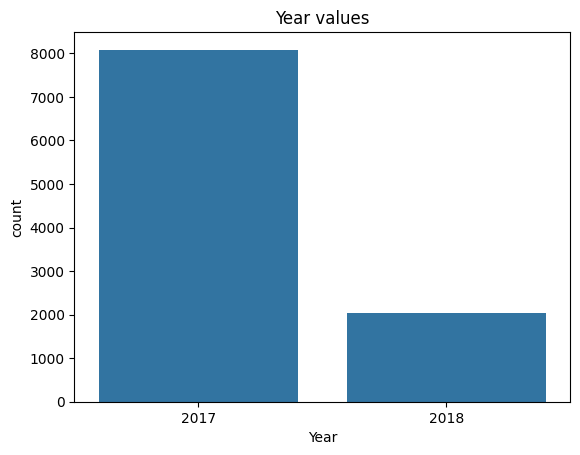

In [ ]:
sns.countplot(x = 'Year', data = df)
plt.title("Year values")
plt.show()

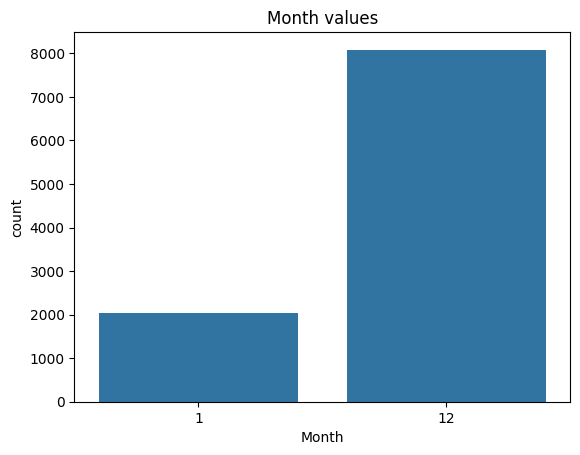

In [ ]:
sns.countplot(x = 'Month', data = df)
plt.title("Month values")
plt.show()

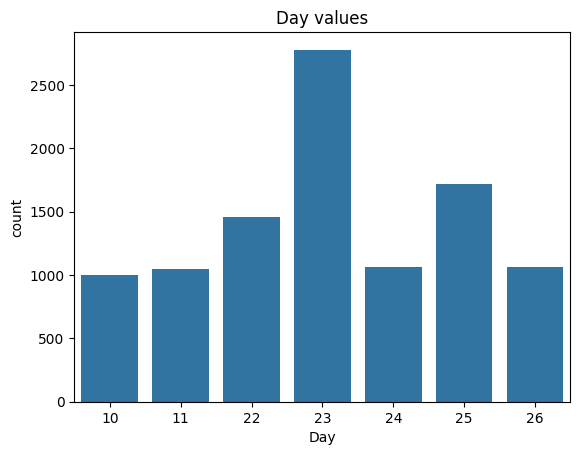

In [ ]:
sns.countplot(x = 'Day', data = df)
plt.title("Day values")
plt.show()

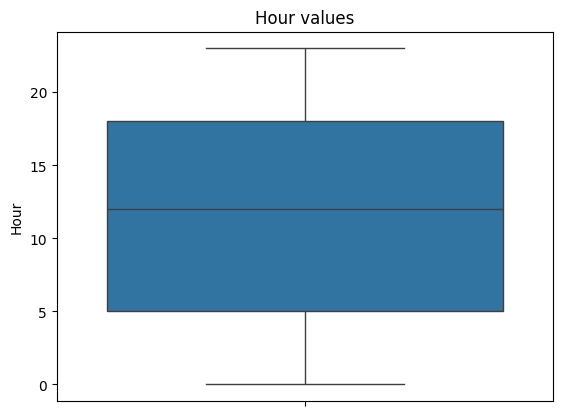

In [ ]:
sns.boxplot(y = 'Hour', data = df)
plt.title("Hour values")
plt.show()

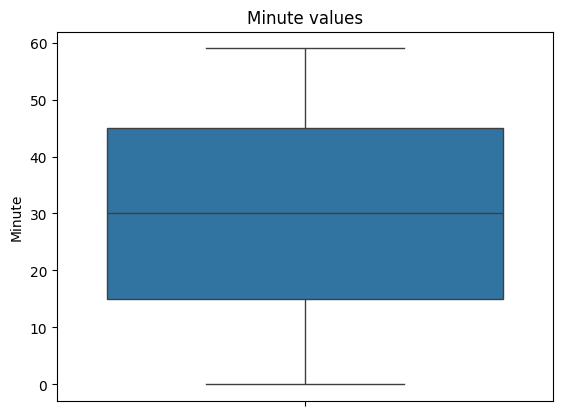

In [ ]:
sns.boxplot(y = 'Minute', data = df)
plt.title("Minute values")
plt.show()

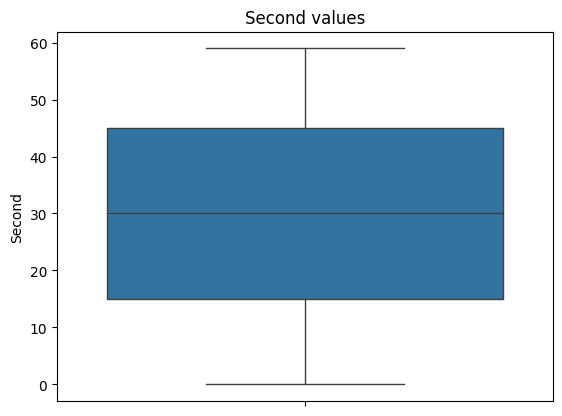

In [ ]:
sns.boxplot(y = 'Second', data = df)
plt.title("Second values")
plt.show()

In [ ]:
df.corr()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Year,Month,Day,Hour,Minute,Second
S1_Temp,1.000000,0.799707,0.948839,0.855279,0.680743,0.548735,0.645163,0.212217,0.436099,0.391137,...,0.137391,0.436363,0.474077,0.700868,-0.139038,0.139038,0.018596,0.542752,-0.005396,-0.000497
S2_Temp,0.799707,1.000000,0.765525,0.696581,0.639773,0.645987,0.607349,0.370897,0.438274,0.409545,...,0.202547,0.476901,0.465884,0.671263,-0.111031,0.111031,0.003701,0.384957,-0.020749,0.003484
S3_Temp,0.948839,0.765525,1.000000,0.885186,0.594311,0.500054,0.642601,0.301419,0.375183,0.344026,...,0.095842,0.403355,0.460309,0.652047,-0.095135,0.095135,-0.003695,0.611898,-0.000191,-0.000227
S4_Temp,0.855279,0.696581,0.885186,1.000000,0.581482,0.456350,0.588459,0.386871,0.355111,0.312594,...,0.106208,0.340000,0.339037,0.526509,-0.440754,0.440754,0.356414,0.515444,-0.010085,-0.002164
S1_Light,0.680743,0.639773,0.594311,0.581482,1.000000,0.842090,0.816438,0.510853,0.601166,0.534274,...,0.498185,0.607159,0.545213,0.849058,-0.164265,0.164265,0.059337,0.236281,-0.002257,0.001033
S2_Light,0.548735,0.645987,0.500054,0.456350,0.842090,1.000000,0.709579,0.458914,0.503021,0.560630,...,0.493281,0.554658,0.556797,0.788764,-0.093851,0.093851,0.011604,0.178996,-0.002202,-0.001703
S3_Light,0.645163,0.607349,0.642601,0.588459,0.816438,0.709579,1.000000,0.579484,0.502606,0.434859,...,0.447708,0.501836,0.577815,0.793081,-0.194756,0.194756,0.107597,0.244777,-0.006829,0.005873
S4_Light,0.212217,0.370897,0.301419,0.386871,0.510853,0.458914,0.579484,1.000000,0.293632,0.303949,...,0.212718,0.324545,0.220196,0.355715,-0.222271,0.222271,0.174769,0.103610,-0.005028,0.002260
S1_Sound,0.436099,0.438274,0.375183,0.355111,0.601166,0.503021,0.502606,0.293632,1.000000,0.560062,...,0.335772,0.522015,0.463040,0.573748,-0.081492,0.081492,0.013507,0.152093,0.022473,0.009482
S2_Sound,0.391137,0.409545,0.344026,0.312594,0.534274,0.560630,0.434859,0.303949,0.560062,1.000000,...,0.357235,0.485697,0.507231,0.557853,-0.031578,0.031578,-0.023732,0.129838,0.017105,-0.003540


In [ ]:
# I dropped the S3_Temp feature because there is a multicollinearity with the S1_Temp
# I dropped Year, Month, Day, Minute, and Second after splitting the Date, and Time features because the relationship for these features with the target is very low
df = df.drop(['S3_Temp', 'Year','Month', 'Day', 'Minute', 'Second'], axis = 1)

In [ ]:
df.head()

,S1_Temp,S2_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour
0,24.94,24.75,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,10
1,24.94,24.75,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,10
2,25.00,24.75,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,10
3,25.00,24.75,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,10
4,25.00,24.75,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,10


In [ ]:
X = df.drop('Room_Occupancy_Count', axis = 1)
y = df['Room_Occupancy_Count']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Before balanced the data and without using Grid Search**

In [ ]:
xgb_b = XGBClassifier()
xgb_b.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_y_pred_b = xgb_b.predict(X_test)

In [ ]:
xgb_acc_b = accuracy_score(y_test, xgb_y_pred_b)
xgb_pre_b = precision_score(y_test, xgb_y_pred_b, average = 'micro')
xgb_rec_b = recall_score(y_test, xgb_y_pred_b, average = 'micro')
xgb_f1_b = f1_score(y_test, xgb_y_pred_b, average = 'micro')

In [ ]:
print("Accuracy for XGboost before over sampling and Grid search", xgb_acc_b)
print("Precision for XGboost before over sampling and Grid search", xgb_pre_b)
print("Recall for XGboost before over sampling and Grid search", xgb_rec_b)
print("F1_Score for XGboost before over sampling and Grid search", xgb_f1_b)

Accuracy for XGboost before over sampling and Grid search 0.9970384995064165
Precision for XGboost before over sampling and Grid search 0.9970384995064165
Recall for XGboost before over sampling and Grid search 0.9970384995064165
F1_Score for XGboost before over sampling and Grid search 0.9970384995064165


In [ ]:
confusion_mat = confusion_matrix(y_test, xgb_y_pred_b)

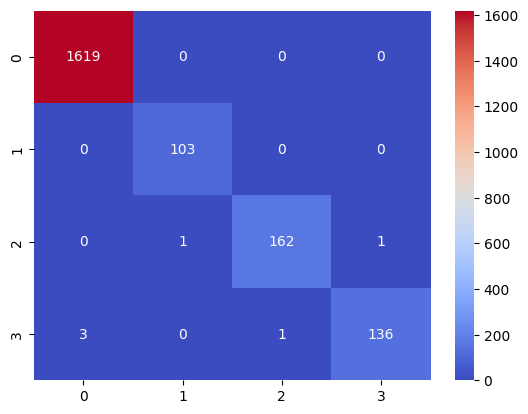

In [ ]:
sns.heatmap(confusion_mat ,annot=True,cmap='coolwarm', fmt='d')
plt.show()

In [ ]:
rf_b = RandomForestClassifier()
rf_b.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_y_pred_b = rf_b.predict(X_test)

In [ ]:
rf_acc_b = accuracy_score(y_test, rf_y_pred_b)
rf_pre_b = precision_score(y_test, rf_y_pred_b, average = 'micro')
rf_rec_b = recall_score(y_test, rf_y_pred_b, average = 'micro')
rf_f1_b = f1_score(y_test, rf_y_pred_b, average = 'micro')

In [ ]:
print("Accuracy for Random Forest before over sampling and Grid search", rf_acc_b)
print("Precision for Random Forest before over sampling and Grid search", rf_pre_b)
print("Recall for Random Forest before over sampling and Grid search", rf_rec_b)
print("F1_Score for Random Forest before over sampling and Grid search", rf_f1_b)

Accuracy for Random Forest before over sampling and Grid search 0.998025666337611
Precision for Random Forest before over sampling and Grid search 0.998025666337611
Recall for Random Forest before over sampling and Grid search 0.998025666337611
F1_Score for Random Forest before over sampling and Grid search 0.998025666337611


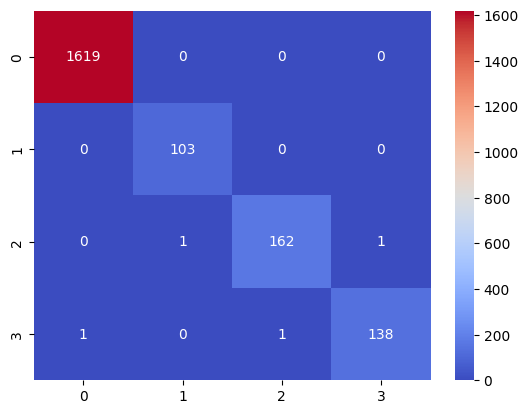

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_y_pred_b) ,annot=True,cmap='coolwarm', fmt='d')
plt.show()

In [ ]:
svm_b = SVC()
svm_b.fit(X_train, y_train)

SVC()

In [ ]:
svm_y_pred_b = svm_b.predict(X_test)

In [ ]:
svm_acc_b = accuracy_score(y_test, svm_y_pred_b)
svm_pre_b = precision_score(y_test, svm_y_pred_b, average = 'micro')
svm_rec_b = recall_score(y_test, svm_y_pred_b, average = 'micro')
svm_f1_b = f1_score(y_test, svm_y_pred_b, average = 'micro')

In [ ]:
print("Accuracy for SVM before over sampling and Grid search", svm_acc_b)
print("Precision for SVM before over sampling and Grid search", svm_pre_b)
print("Recall for SVM before over sampling and Grid search", svm_rec_b)
print("F1_Score for SVM before over sampling and Grid search", svm_f1_b)

Accuracy for SVM before over sampling and Grid search 0.9921026653504442
Precision for SVM before over sampling and Grid search 0.9921026653504442
Recall for SVM before over sampling and Grid search 0.9921026653504442
F1_Score for SVM before over sampling and Grid search 0.9921026653504442


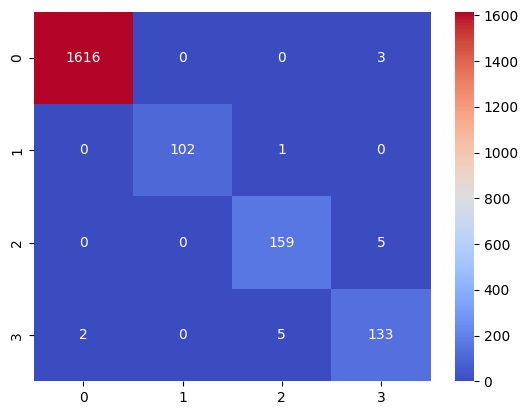

In [ ]:
sns.heatmap(confusion_matrix(y_test, svm_y_pred_b) ,annot=True,cmap='coolwarm', fmt='d')
plt.show()

In [ ]:
gb_b = GradientBoostingClassifier()
gb_b.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
gb_y_pred_b = gb_b.predict(X_test)

In [ ]:
gb_acc_b = accuracy_score(y_test, gb_y_pred_b)
gb_pre_b = precision_score(y_test, gb_y_pred_b, average = 'micro')
gb_rec_b = recall_score(y_test, gb_y_pred_b, average = 'micro')
gb_f1_b = f1_score(y_test, gb_y_pred_b, average = 'micro')

In [ ]:
print("Accuracy for Gradient boost before over sampling and Grid search", gb_acc_b)
print("Precision for Gradient boost before over sampling and Grid search", gb_pre_b)
print("Recall for Gradient boost before over sampling and Grid search", gb_rec_b)
print("F1_Score for Gradient boost before over sampling and Grid search", gb_f1_b)

Accuracy for Gradient boost before over sampling and Grid search 0.9955577492596249
Precision for Gradient boost before over sampling and Grid search 0.9955577492596249
Recall for Gradient boost before over sampling and Grid search 0.9955577492596249
F1_Score for Gradient boost before over sampling and Grid search 0.9955577492596249


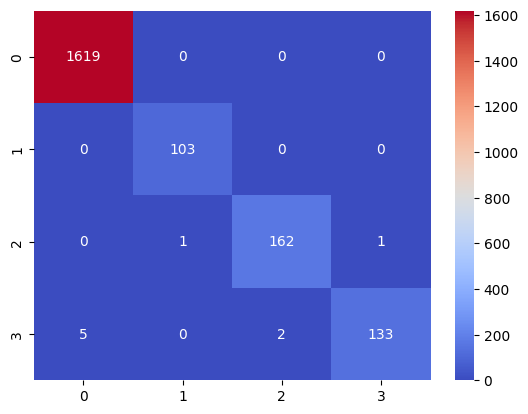

In [ ]:
sns.heatmap(confusion_matrix(y_test, gb_y_pred_b) ,annot=True,cmap='coolwarm', fmt='d')
plt.show()

# **After balanced the data and using Grid search**

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

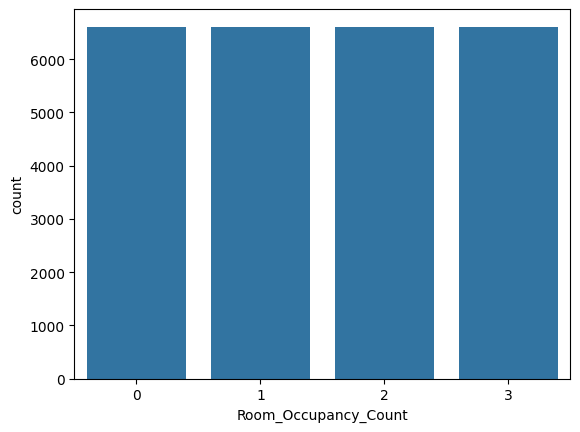

In [ ]:
sns.countplot(x = y_train_smote)
plt.show()

In [ ]:
xgb_parameters = {"n_estimators" : [10, 50, 150], "learning_rate" : [0.1, 0.01, 0.001], 'reg_alpha' : [1, 2, 3, 4], 'reg_lambda' : [1, 2, 3, 4]}

xgb_a = XGBClassifier()

xgb_grid_search = GridSearchCV(xgb_a, xgb_parameters, cv = 5)

xgb_grid_search.fit(X_train_smote, y_train_smote)

xgb_a_best_parameters = xgb_grid_search.best_params_

xgb_a_best_parameters

{'learning_rate': 0.1, 'n_estimators': 150, 'reg_alpha': 2, 'reg_lambda': 4}

In [ ]:
best_xgb_a = XGBClassifier(**xgb_a_best_parameters)

best_xgb_a.fit(X_train_smote, y_train_smote)

y_predictions_xgb = best_xgb_a.predict(X_test)

In [ ]:
xgb_acc_a = accuracy_score(y_test, y_predictions_xgb)
xgb_pre_a = precision_score(y_test, y_predictions_xgb, average = 'micro')
xgb_rec_a = recall_score(y_test, y_predictions_xgb, average = 'micro')
xgb_f1_a = f1_score(y_test, y_predictions_xgb, average = 'micro')

In [ ]:
print("Accuracy for XGboost After over sampling and Grid search", xgb_acc_a)
print("Precision for XGboost After over sampling and Grid search", xgb_pre_a)
print("Recall for XGboost After over sampling and Grid search", xgb_rec_a)
print("F1_Score for XGboost After over sampling and Grid search", xgb_f1_a)

Accuracy for XGboost After over sampling and Grid search 0.998025666337611
Precision for XGboost After over sampling and Grid search 0.998025666337611
Recall for XGboost After over sampling and Grid search 0.998025666337611
F1_Score for XGboost After over sampling and Grid search 0.998025666337611


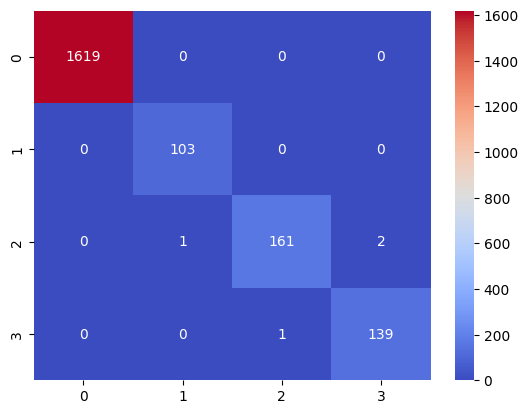

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predictions_xgb) , annot = True, cmap = 'coolwarm', fmt = 'd')
plt.show()

In [ ]:
rf_parameters = {"n_estimators" : [10, 50, 150], "max_depth" : [10, 20, 30, 40], "max_features" : ['auto', 'sqrt', 'log2']}

rf_a = RandomForestClassifier()

rf_Grid_search = GridSearchCV(rf_a, rf_parameters, cv = 5)

rf_Grid_search.fit(X_train_smote, y_train_smote)

rf_Grid_search_prameters = rf_Grid_search.best_params_

print(rf_Grid_search_prameters)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}


In [ ]:
best_rf_a = RandomForestClassifier(**rf_Grid_search_prameters)

best_rf_a.fit(X_train_smote, y_train_smote)

y_predictions_rf = best_rf_a.predict(X_test)

In [ ]:
rf_acc_a = accuracy_score(y_test, y_predictions_rf)
rf_pre_a = precision_score(y_test, y_predictions_rf, average = 'micro')
rf_rec_a = recall_score(y_test, y_predictions_rf, average = 'micro')
rf_f1_a = f1_score(y_test, y_predictions_rf, average = 'micro')

In [ ]:
print("Accuracy for Random Forest After over sampling and Grid search", rf_acc_a)
print("Precision for Random Forest After over sampling and Grid search", rf_pre_a)
print("Recall for Random Forest After over sampling and Grid search", rf_rec_a)
print("F1_Score for Random Forest After over sampling and Grid search", rf_f1_a)

Accuracy for Random Forest After over sampling and Grid search 0.998025666337611
Precision for Random Forest After over sampling and Grid search 0.998025666337611
Recall for Random Forest After over sampling and Grid search 0.998025666337611
F1_Score for Random Forest After over sampling and Grid search 0.998025666337611


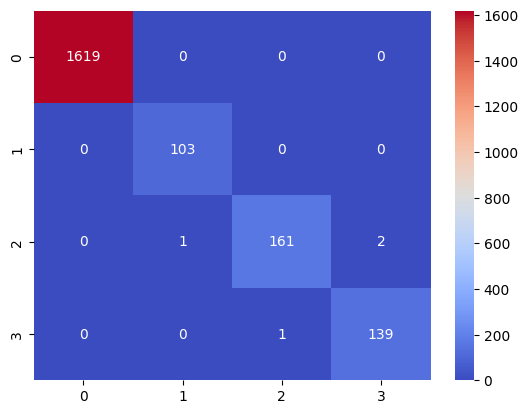

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predictions_rf) , annot = True, cmap = 'coolwarm', fmt = 'd')
plt.show()

In [ ]:
svm_parameters = {"C" : [1, 3, 5, 7], "kernel" : ["linear", "rbf", "poly"], "degree" : [1, 3, 5, 7], "gamma" : ["scale", "auto"]}

svm_a = SVC()

svm_Grid_search = GridSearchCV(svm_a, svm_parameters, cv = 5)

svm_Grid_search.fit(X_train_smote, y_train_smote)

svm_Grid_search_prameters = svm_Grid_search.best_params_

print(svm_Grid_search_prameters)



{'C': 7, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
best_svm_a = SVC(**svm_Grid_search_prameters)

best_svm_a.fit(X_train_smote, y_train_smote)

y_predictions_svm = best_svm_a.predict(X_test)

In [ ]:
svm_acc_a = accuracy_score(y_test, y_predictions_svm)
svm_pre_a = precision_score(y_test, y_predictions_svm, average = 'micro')
svm_rec_a = recall_score(y_test, y_predictions_svm, average = 'micro')
svm_f1_a = f1_score(y_test, y_predictions_svm, average = 'micro')

In [ ]:
print("Accuracy for SVM After over sampling and Grid search", svm_acc_a)
print("Precision for SVM After over sampling and Grid search", svm_pre_a)
print("Recall for SVM After over sampling and Grid search", svm_rec_a)
print("F1_Score for SVM After over sampling and Grid search", svm_f1_a)

Accuracy for SVM After over sampling and Grid search 0.993583415597236
Precision for SVM After over sampling and Grid search 0.993583415597236
Recall for SVM After over sampling and Grid search 0.993583415597236
F1_Score for SVM After over sampling and Grid search 0.993583415597236


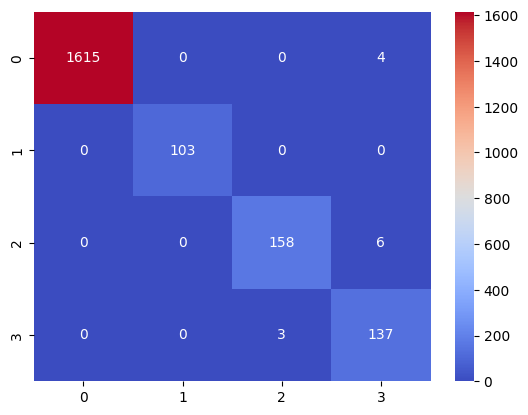

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predictions_svm) , annot = True, cmap = 'coolwarm', fmt = 'd')
plt.show()

In [ ]:
gb_parameters = {"learning_rate" : [0.1, 0.01, 0.001], "n_estimators" : [10, 50, 150]}

gb_a = GradientBoostingClassifier()

gb_Grid_search = GridSearchCV(gb_a, gb_parameters, cv = 5 )

gb_Grid_search.fit(X_train_smote, y_train_smote)

gb_Grid_search_prameters = gb_Grid_search.best_params_

print(gb_Grid_search_prameters)



{'learning_rate': 0.1, 'n_estimators': 150}


In [ ]:
best_gb_a = GradientBoostingClassifier(**gb_Grid_search_prameters)

best_gb_a.fit(X_train_smote, y_train_smote)

y_predictions_gb = best_gb_a.predict(X_test)

In [ ]:
gb_acc_a = accuracy_score(y_test, y_predictions_gb)
gb_pre_a = precision_score(y_test, y_predictions_gb, average = 'micro')
gb_rec_a = recall_score(y_test, y_predictions_gb, average = 'micro')
gb_f1_a = f1_score(y_test, y_predictions_gb, average = 'micro')

In [ ]:
print("Accuracy for Gradient Boosting After over sampling and Grid search", gb_acc_a)
print("Precision for Gradient Boosting After over sampling and Grid search", gb_pre_a)
print("Recall for Gradient Boosting After over sampling and Grid search", gb_rec_a)
print("F1_Score for Gradient Boosting After over sampling and Grid search", gb_f1_a)

Accuracy for Gradient Boosting After over sampling and Grid search 0.9990128331688055
Precision for Gradient Boosting After over sampling and Grid search 0.9990128331688055
Recall for Gradient Boosting After over sampling and Grid search 0.9990128331688055
F1_Score for Gradient Boosting After over sampling and Grid search 0.9990128331688055


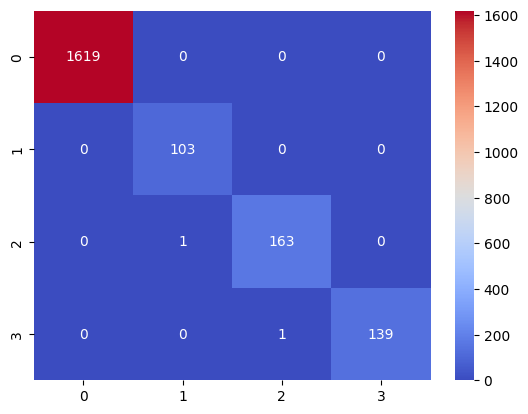

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_predictions_gb) , annot = True, cmap = 'coolwarm', fmt = 'd')
plt.show()